# Assignment: Diagnostic Analysis using Python

Name: Gavin van de Bunt <br>
Date: 30-10-2022

### Assignment Brief

This analysis has been conducted for the National Health Services (NHS) 
in order to get a better understanding of the reasons why patients miss 
general practitioner (GP) appointments. <br>

It contains 8 sections: <br>
1. Import relevant libraries and data files.
2. Sense check created dataframes and check for basic data quality issues.
3. Preliminary exploration of the different features of the data sets.
4. Explore the range and trends in the number of appointments.
5. Explore trending healthcare topics on Twitter.
6. Explore staffing and resourcing within the NHS.
7. Are there significant changes in whether or not visits are attended?
8. Other explored questions.

### 1. Import relevant libraries and data files.

In [1]:
# Import necessary libraries.
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Import all data files.
ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')

### 2. Sense check created dataframes and check for basic data quality issues.

In [3]:
# Actual duration
print(ad.dtypes)
print(ad.shape)
print(ad.isna().sum())
print(ad.head())
print(ad.tail())
print(ad.info())
print(ad.describe())

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
(137793, 8)
sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64
  sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North 

In [4]:
# Appointments regional
print(ar.dtypes)
print(ar.shape)
print(ar.isna().sum())
print(ar.head())
print(ar.tail())
print(ar.info())
print(ar.describe())

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
(596821, 7)
icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64
  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended     

In [5]:
# National categories
print(nc.dtypes)
print(nc.shape)
print(nc.isna().sum())
print(nc.head())
print(nc.tail())
print(nc.info())
print(nc.describe())

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
(817394, 8)
appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64
  appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E5400005

### 3. Preliminary exploration of the different features of the data sets.

In [6]:
# How many locations are there in the data set?

# Actual duration.
print(len(ad['sub_icb_location_code'].unique()))
print(len(ad['sub_icb_location_ons_code'].unique()))
print(len(ad['sub_icb_location_name'].unique()))
print(len(ad['icb_ons_code'].unique()))
print(len(ad['region_ons_code'].unique()))

# Same in appointments regional?
print(len(ar['icb_ons_code'].unique()))

# Same in national categories?
print(len(nc['icb_ons_code'].unique()))
print(len(nc['sub_icb_location_name'].unique()))

106
106
106
42
7
42
42
106


In [7]:
# How many service settings are there?
print(nc['service_setting'].unique())
print(len(nc['service_setting'].unique()))

# How many context types are there?
print(nc['context_type'].unique())
print(len(nc['context_type'].unique()))

# How many national categories are there?
print(nc['national_category'].unique())
print(len(nc['national_category'].unique()))

#How many appointment statuses are there?
print(ar['appointment_status'].unique())
print(len(ar['appointment_status'].unique()))

['Primary Care Network' 'Other' 'General Practice' 'Unmapped'
 'Extended Access Provision']
5
['Care Related Encounter' 'Unmapped' 'Inconsistent Mapping']
3
['Patient contact during Care Home Round' 'Planned Clinics' 'Home Visit'
 'General Consultation Acute' 'Structured Medication Review'
 'Care Home Visit' 'Unmapped' 'Clinical Triage'
 'Planned Clinical Procedure' 'Inconsistent Mapping'
 'Care Home Needs Assessment & Personalised Care and Support Planning'
 'General Consultation Routine'
 'Service provided by organisation external to the practice'
 'Unplanned Clinical Activity' 'Social Prescribing Service'
 'Non-contractual chargeable work'
 'Group Consultation and Group Education' 'Walk-in']
18
['Attended' 'DNA' 'Unknown']
3


In [8]:
# Between what dates were appointments scheduled?

# Change the format to ensure function outcome is interpretable.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# Format for other fields is suitable for using min/max.
print(ad['appointment_date'].min())
print(ad['appointment_date'].max())
print(ar['appointment_month'].min())
print(ar['appointment_month'].max())
print(nc['appointment_month'].min())
print(nc['appointment_month'].max())

2021-12-01 00:00:00
2022-06-30 00:00:00
2020-01
2022-06
2021-08
2022-06


### 4. Explore the range and trends in the number of appointments.

In [9]:
# Which month had the highest number of appointments?
appt_month = nc.groupby(by='appointment_month').sum('count_of_appointments')
appt_month.sort_values(by='count_of_appointments', ascending=False)

,count_of_appointments
appointment_month,
2021-11,30405070
2021-10,30303834
2022-03,29595038
2021-09,28522501
2022-05,27495508
2022-06,25828078
2022-01,25635474
2022-02,25355260
2021-12,25140776


  appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
1           2021-08           General Practice               21575852
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

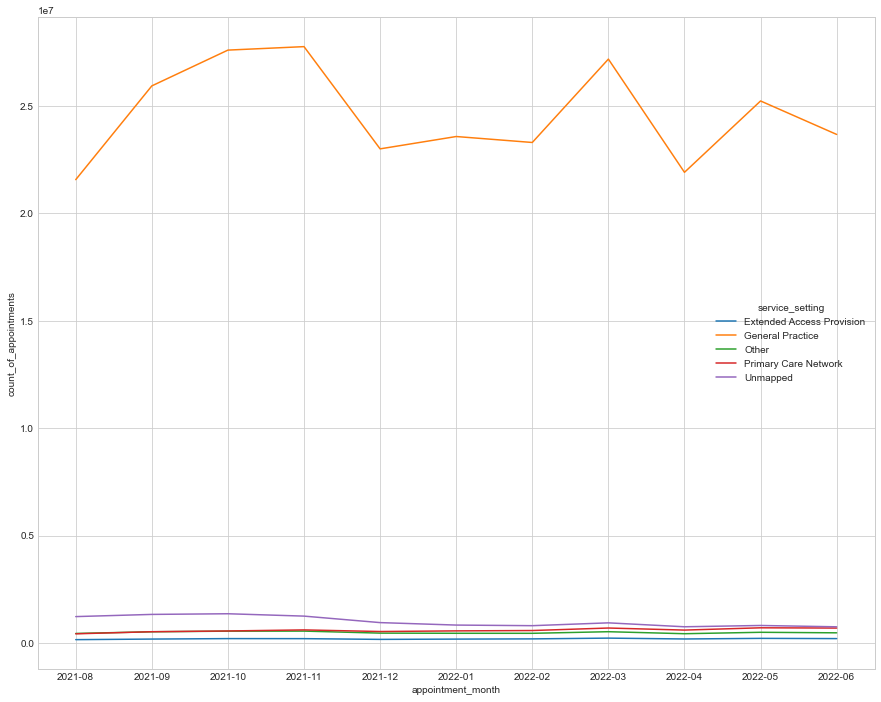

In [10]:
# Importing additional necessary libraries for visualisation.

# Set the figure size (15, 12) and the plot style as white.
plt.rcParams["figure.figsize"] = (15,12)
plt.style.use('seaborn-whitegrid')
plt.plot(data=None)

# Set the maximum column width of the DataFrame to 200.
pd.options.display.max_colwidth=200

# Create visualisation indicating the number of appointments per month for service settings.
nc_ss = nc.groupby(by=['appointment_month','service_setting']).sum('count_of_appointments').reset_index()
print(nc_ss.head(5))
sns.lineplot(x='appointment_month',y='count_of_appointments',hue='service_setting',ci=None,data=nc_ss,estimator='sum')

  appointment_month            context_type  count_of_appointments
0           2021-08  Care Related Encounter               20255235
1           2021-08    Inconsistent Mapping                2363093
2           2021-08                Unmapped                1233843
3           2021-09  Care Related Encounter               24404251
4           2021-09    Inconsistent Mapping                2782135


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

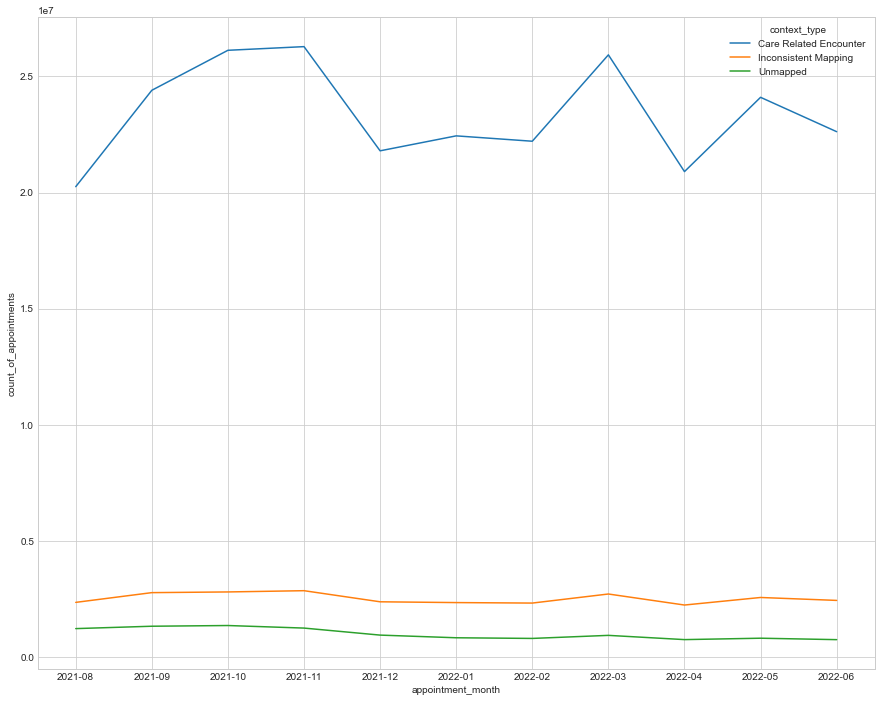

In [11]:
# Create visualisation indicating the number of appointments per month for context types.
nc_ct = nc.groupby(by=['appointment_month','context_type']).sum('count_of_appointments').reset_index()
print(nc_ct.head(5))
sns.lineplot(x='appointment_month',y='count_of_appointments',hue='context_type',ci=None,data=nc_ct,estimator='sum')

  appointment_month  \
0           2021-08   
1           2021-08   
2           2021-08   
3           2021-08   
4           2021-08   

                                                     national_category  \
0  Care Home Needs Assessment & Personalised Care and Support Planning   
1                                                      Care Home Visit   
2                                                      Clinical Triage   
3                                           General Consultation Acute   
4                                         General Consultation Routine   

   count_of_appointments  
0                  29676  
1                  47583  
2                3704207  
3                4280920  
4                7756045  


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

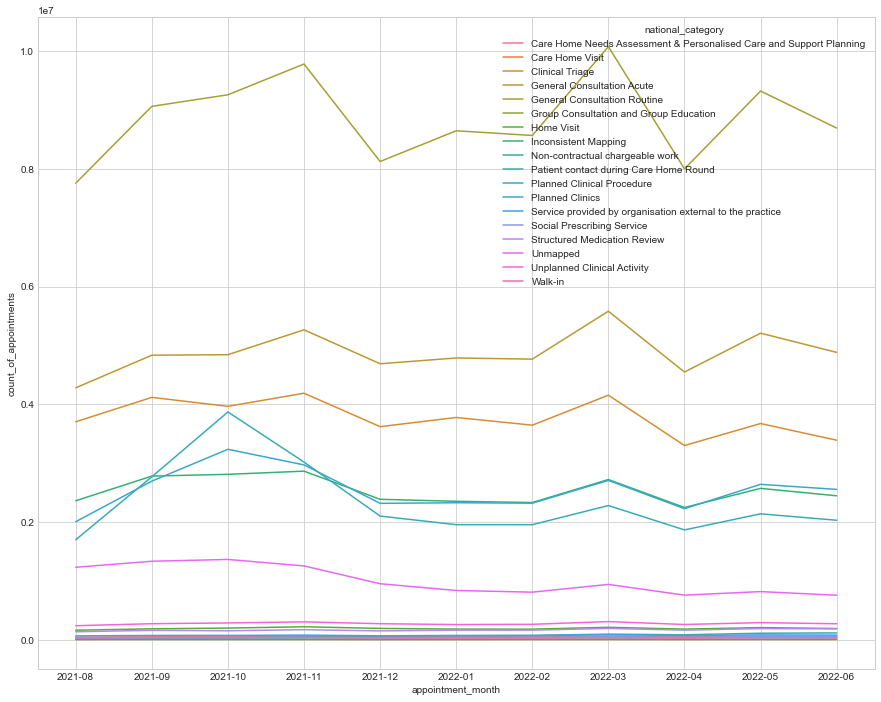

In [12]:
# Create visualisation indicating the number of appointments per month for national categories.
nc_nc = nc.groupby(by=['appointment_month','national_category']).sum('count_of_appointments').reset_index()
print(nc_nc.head(5))
sns.lineplot(x='appointment_month',y='count_of_appointments',hue='national_category',ci=None,data=nc_nc,estimator='sum')

In [13]:
# Create four visualisations indicating the number of appointments for service setting per season. 
# The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), 
# and spring (April 2022).
nc_ss_day = nc.groupby(by=['appointment_month','service_setting']).sum('count_of_appointments').reset_index()
nc_ss_day.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


In [14]:
# Create mapping of months to season, loosely based on instructions.
seasons = {'appointment_month' : ['2021-08','2021-09','2021-10','2021-11','2021-12','2022-01','2022-02','2022-03','2022-04','2022-05','2022-06'],
           'seasons' : ['summer','summer','autumn','autumn','autumn','winter','winter','winter','spring','spring','spring']}

# Turn dictionary into Pandas DataFrame.
seasons_df = pd.DataFrame(seasons)
print(seasons_df.head())

# Merge seasons to original table to use for chart.
nc_ss_seasons = nc_ss_day.merge(seasons_df,on='appointment_month',how='left')
print(nc_ss_seasons.head())

  appointment_month seasons
0           2021-08  summer
1           2021-09  summer
2           2021-10  autumn
3           2021-11  autumn
4           2021-12  autumn
  appointment_month            service_setting  count_of_appointments seasons
0           2021-08  Extended Access Provision                 160927  summer
1           2021-08           General Practice               21575852  summer
2           2021-08                      Other                 449101  summer
3           2021-08       Primary Care Network                 432448  summer
4           2021-08                   Unmapped                1233843  summer


  seasons            service_setting  count_of_appointments
0  autumn  Extended Access Provision           1.968733e+05
1  autumn           General Practice           2.612763e+07
2  autumn                      Other           5.266630e+05
3  autumn       Primary Care Network           5.729280e+05
4  autumn                   Unmapped           1.192470e+06


<AxesSubplot:xlabel='seasons', ylabel='count_of_appointments'>

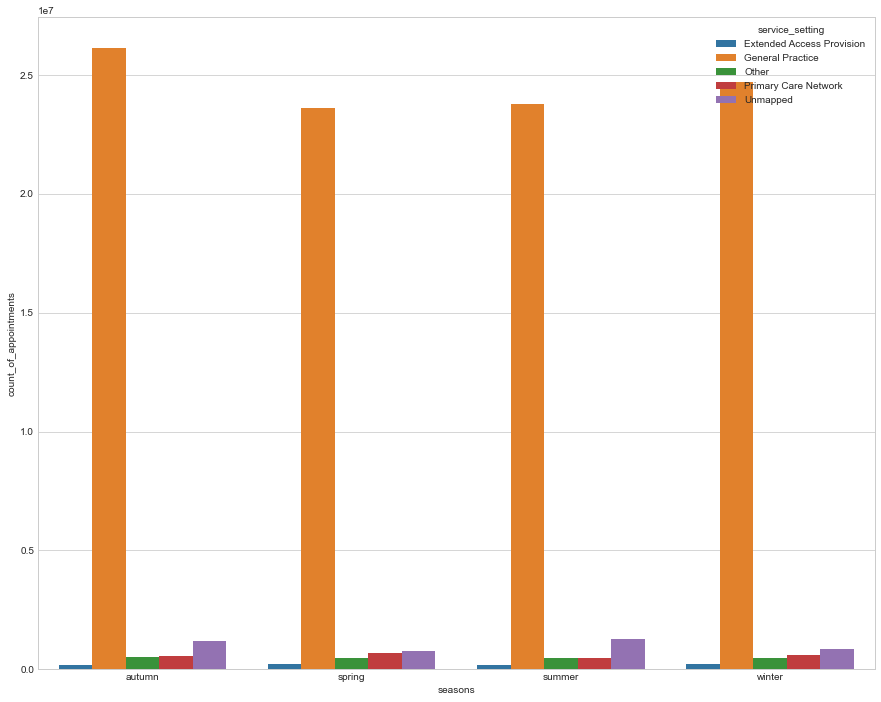

In [15]:
# Average as not every season has equal amount of data.
nc_ss_seasons_avg = nc_ss_seasons.groupby(by=['seasons','service_setting']).mean('count_of_appointments').reset_index()
print(nc_ss_seasons_avg.head())
sns.barplot(x='seasons',y='count_of_appointments',hue='service_setting',data=nc_ss_seasons_avg,ci=None)

### 5. Explore trending healthcare topics on Twitter.

In [16]:
# Load the tweets.csv file and create a new DataFrame.
tweets = pd.read_csv('tweets.csv')
tweets.head()

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [17]:
# Explore the data set with the describe() and info() functions. 
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [18]:
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [19]:
# Explore the tweet_retweet_count and tweet_favorite_count columns with the value_counts() function.

print(tweets.value_counts('tweet_retweet_count').head(10))
print(tweets.value_counts('tweet_favorite_count').head(10))

tweet_retweet_count
0     526
1     215
2     114
3      70
5      35
4      27
7      18
12     16
8      15
73     14
dtype: int64
tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
13       1
28       1
20       1
dtype: int64


In [20]:
# Create a new DataFrame (e.g. tweets_text) with only text values.

tweets_text = tweets['tweet_full_text']
tweets_text.head()

0    As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...
1                                                                RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…
2                                                             RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3                                                               RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4    ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take 

In [21]:
# Create a variable (tags,) and assign an empty list to it.

tags = []

# Use a for loop, and specify the iterator_variable and the sequence.

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
            
tags[0:29]

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9']

In [22]:
# Create a Pandas Series to count the values in the list. Set the Series equal to tags.

tags_series = pd.Series(tags)
tags_series.value_counts(ascending=False).head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [23]:
# Convert the new Series into a DataFrame.

tags_df = pd.DataFrame(tags_series.value_counts()).reset_index()
tags_df.head()

,index,0
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [24]:
# Rename the columns to word and count.
tags_df.rename(columns={'index':'word',0:'count'},inplace=True)

# Ensure the count data type is an integer for data analysis.
tags_df.dtypes

word     object
count     int64
dtype: object

<AxesSubplot:xlabel='count', ylabel='word'>

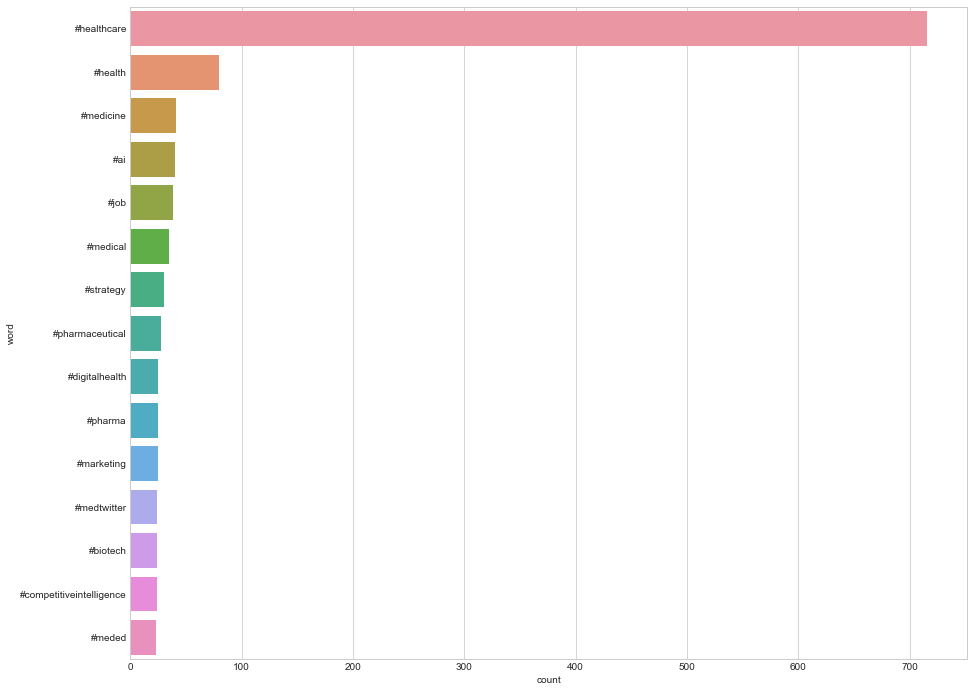

In [25]:
# Display records where the count is larger than 20.
tags_bar = tags_df[tags_df['count'] > 20]

# Create a Seaborn barplot displaying the frequently used #.
sns.barplot(y='word',x='count',data=tags_bar,orient='h')

### 6. Explore staffing and resourcing within the NHS.

In [26]:
# Create a new DataFrame (ar_agg) to review the different features.
ar_agg = ar[['appointment_month','hcp_type','appointment_status','appointment_mode','time_between_book_and_appointment','count_of_appointments']]
ar_agg = ar_agg[ar_agg['appointment_month'] >= '2021-08']
ar_agg.head()

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,2021-08,GP,Attended,Face-to-Face,1 Day,6553
3653,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,2390
3654,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,10547
3655,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,937
3656,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,4961


In [27]:
# Determine total number of appointments per month.
ar_df = ar_agg.groupby(by='appointment_month').sum('count_of_appointments').reset_index()
ar_df.head()

,appointment_month,count_of_appointments
0,2021-08,23852171
1,2021-09,28522501
2,2021-10,30303834
3,2021-11,30405070
4,2021-12,25140776


In [28]:
# Calculate the average utilisation of service.
ar_df['utilisation'] = round(ar_df['count_of_appointments'] / 30,1)

# Calculate rate as percentage of total daily capacity (1.2m)
ar_df['ut_rate'] = round(ar_df['utilisation'] / 1200000 * 100,1)
ar_df.head()

,appointment_month,count_of_appointments,utilisation,ut_rate
0,2021-08,23852171,795072.4,66.3
1,2021-09,28522501,950750.0,79.2
2,2021-10,30303834,1010127.8,84.2
3,2021-11,30405070,1013502.3,84.5
4,2021-12,25140776,838025.9,69.8


[(0.0, 40000000.0)]

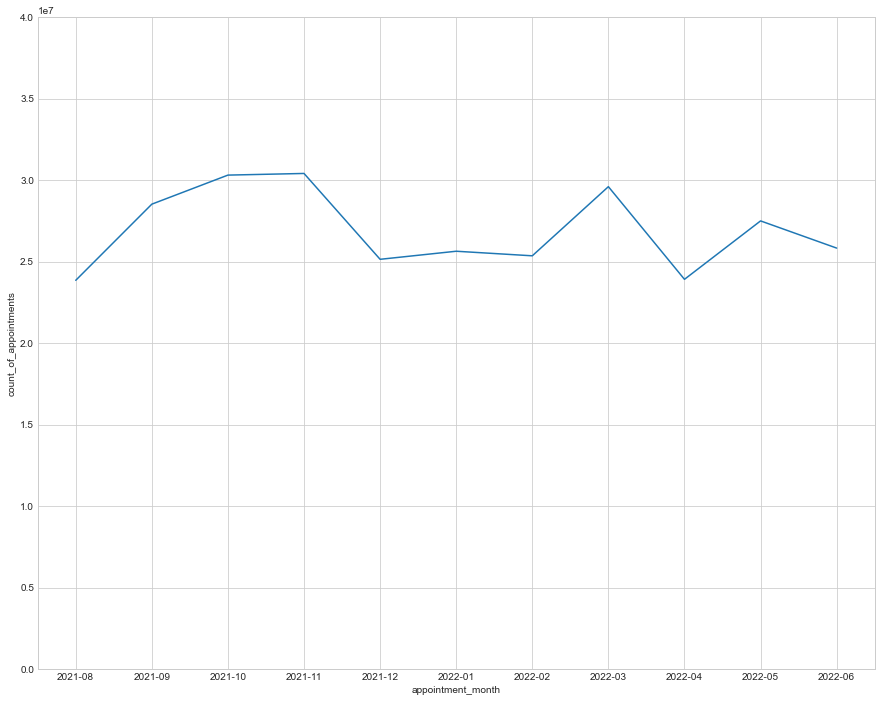

In [29]:
# Create a lineplot indicating the number of monthly visits.
plot = sns.lineplot(x='appointment_month',y='count_of_appointments',data=ar_df,estimator='sum')
plot.set(ylim=(0, 4e7))

[(0.0, 100.0)]

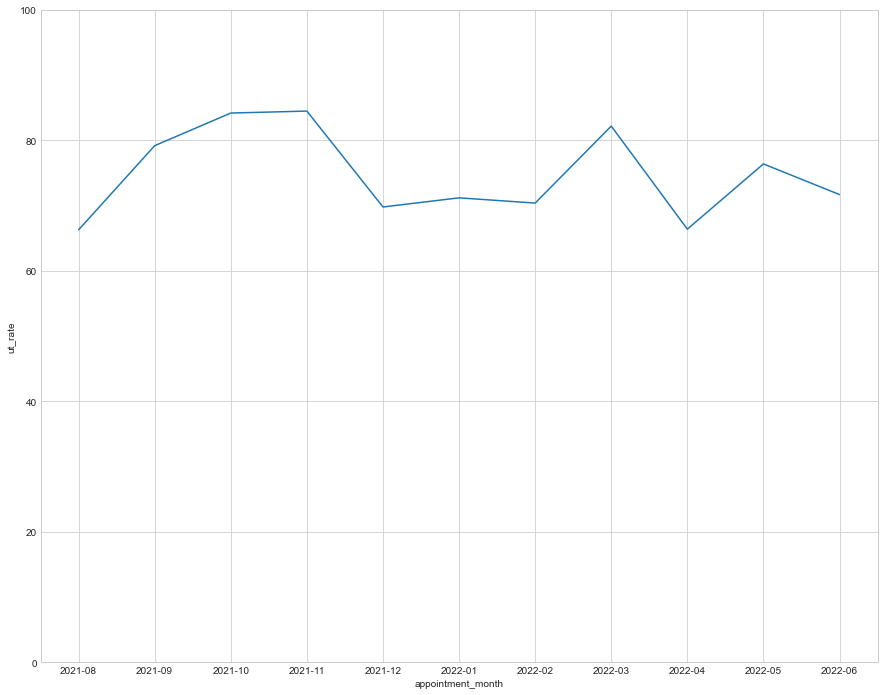

In [30]:
# Create a lineplot indicating the monthly capacity utilisation.
plot = sns.lineplot(x='appointment_month',y='ut_rate',data=ar_df)
plot.set(ylim=(0, 100))

### 7. Are there significant changes in whether or not visits are attended?

In [31]:
# Calculate subset of not attended appointments of total number of appointments.
dna_agg = ar_agg.groupby(by=['appointment_month','appointment_status']).sum('count_of_appointments').reset_index()
dna_pivot = dna_agg.pivot(index='appointment_month',columns='appointment_status',values='count_of_appointments')
dna_pivot['dna_rate'] = round(100* dna_pivot['DNA'] / (dna_pivot['Attended'] + dna_pivot['DNA'] + dna_pivot['Unknown']),1)

dna_pivot.head(20)

appointment_status,Attended,DNA,Unknown,dna_rate
appointment_month,,,,
2021-08,22081765,949137,821269,4.0
2021-09,25757066,1321348,1444087,4.6
2021-10,27170506,1565624,1567704,5.2
2021-11,27667665,1428087,1309318,4.7
2021-12,22853483,1198866,1088427,4.8
2022-01,23597196,1076013,962265,4.2
2022-02,23351939,1076658,926663,4.2
2022-03,27170002,1289888,1135148,4.4
2022-04,21948814,1045455,918791,4.4


[(0.0, 1600000.0)]

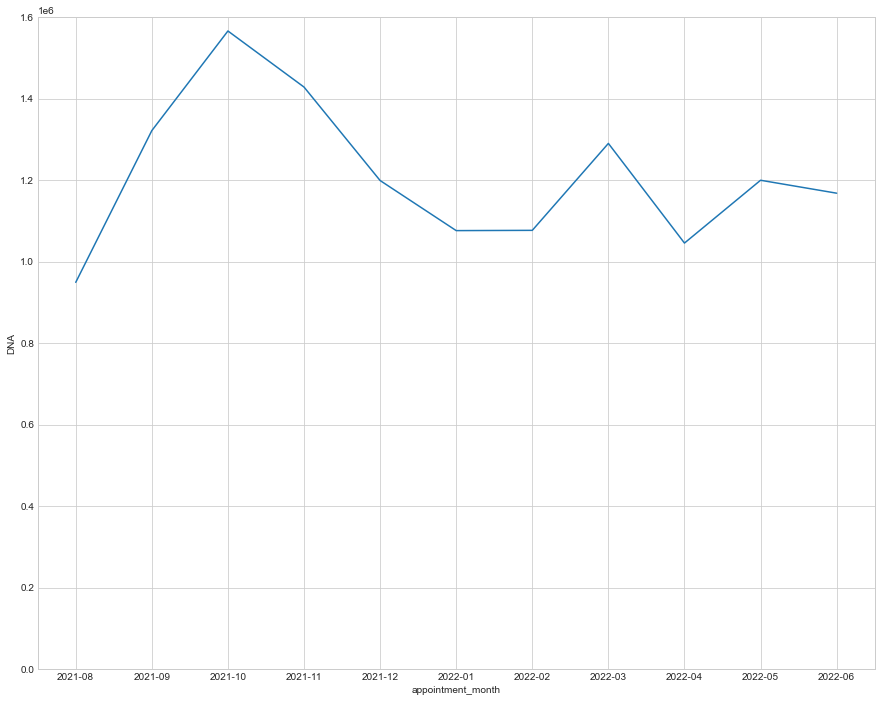

In [32]:
# First we plot the absolute numbers of not attended visits over time.
plot = sns.lineplot(x='appointment_month',y='DNA', data=dna_pivot, ci=None)
plot.set(ylim=(0, 1600000))

[(0.0, 6.0)]

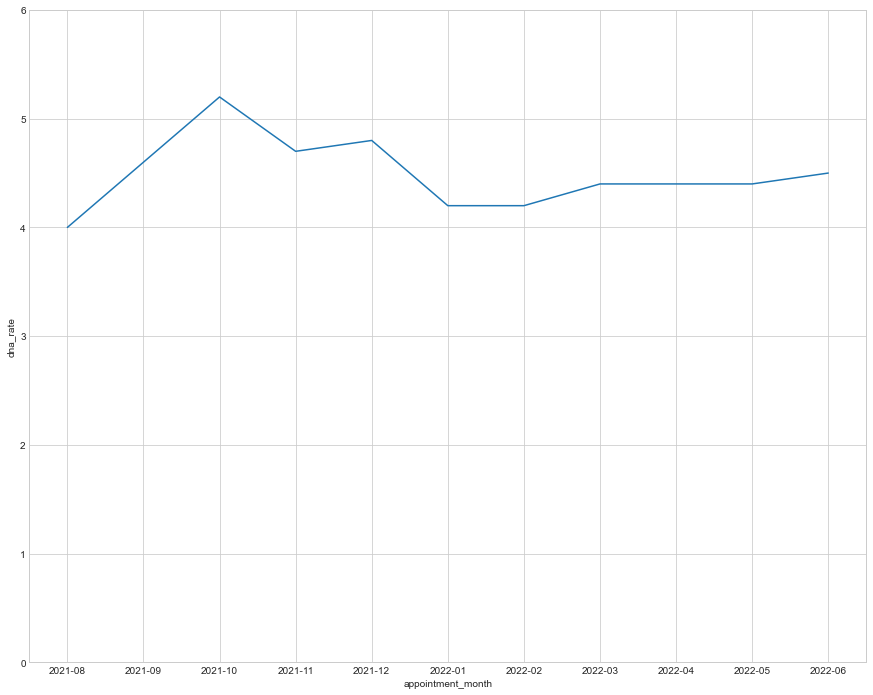

In [33]:
# Then we plot the not attended visit as percentage of total appointments.

plot = sns.lineplot(x='appointment_month',y='dna_rate', data=dna_pivot, ci=None)
plot.set(ylim=(0, 6))

### 8. Other explored questions.

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

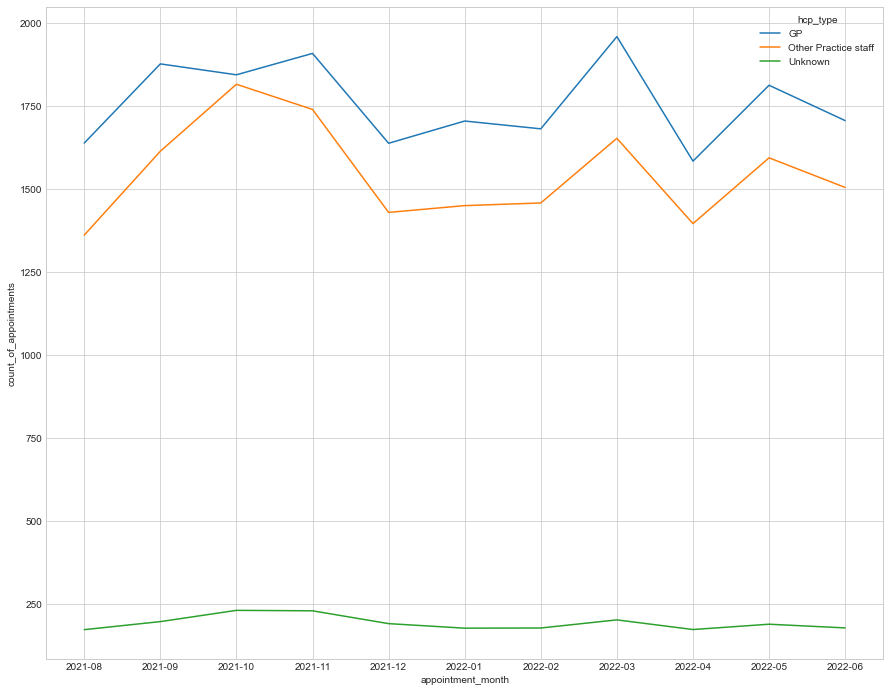

In [34]:
# How do the healthcare professional types differ over time?

sns.lineplot(x='appointment_month',y='count_of_appointments',hue='hcp_type',data=ar_agg, ci=None)

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

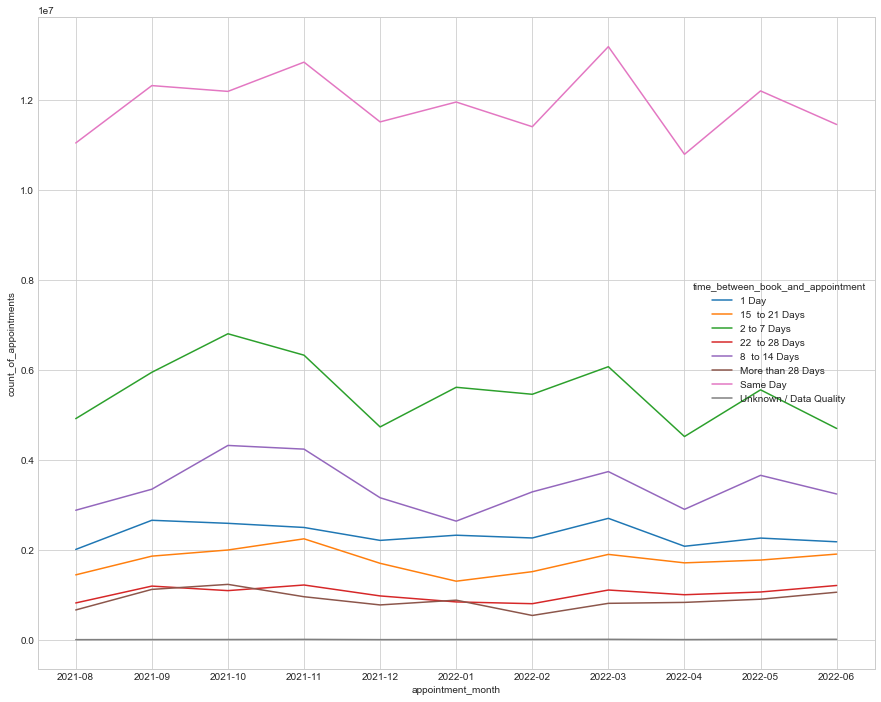

In [35]:
# Are there any trends in time between booking an appointment?
sns.lineplot(x='appointment_month',y='count_of_appointments',hue='time_between_book_and_appointment',data=ar_agg, ci=None,estimator='sum')

  appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
1           2021-08           General Practice               21575852
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843


<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

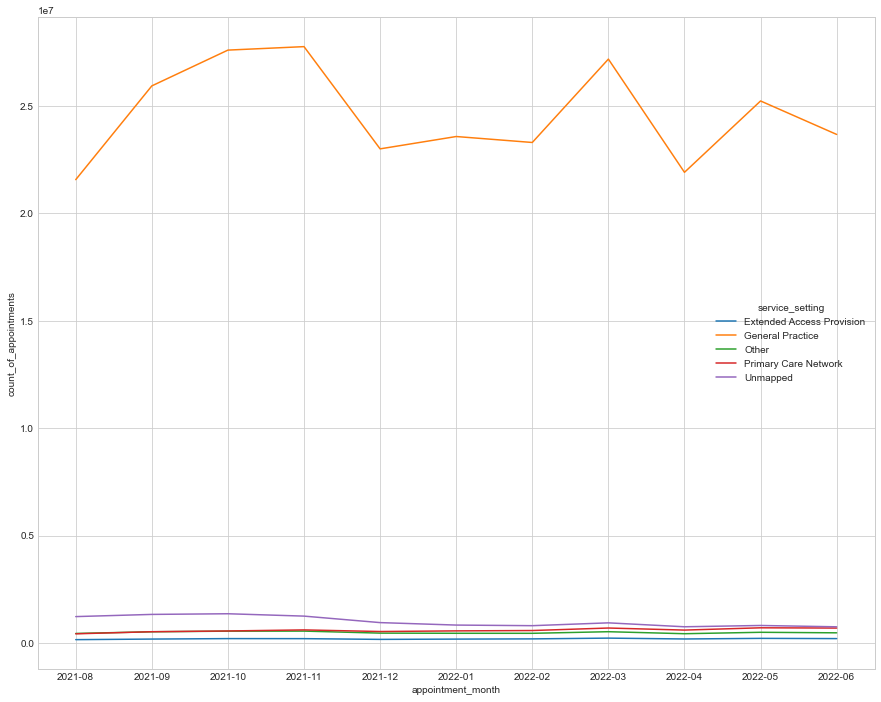

In [36]:
# How do the various service settings compare?
nc_agg = nc.groupby(by=['appointment_month','service_setting']).sum('count_of_appointments').reset_index()
print(nc_agg.head())
sns.lineplot(x='appointment_month',y='count_of_appointments',data=nc_agg,hue='service_setting',estimator='sum')

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

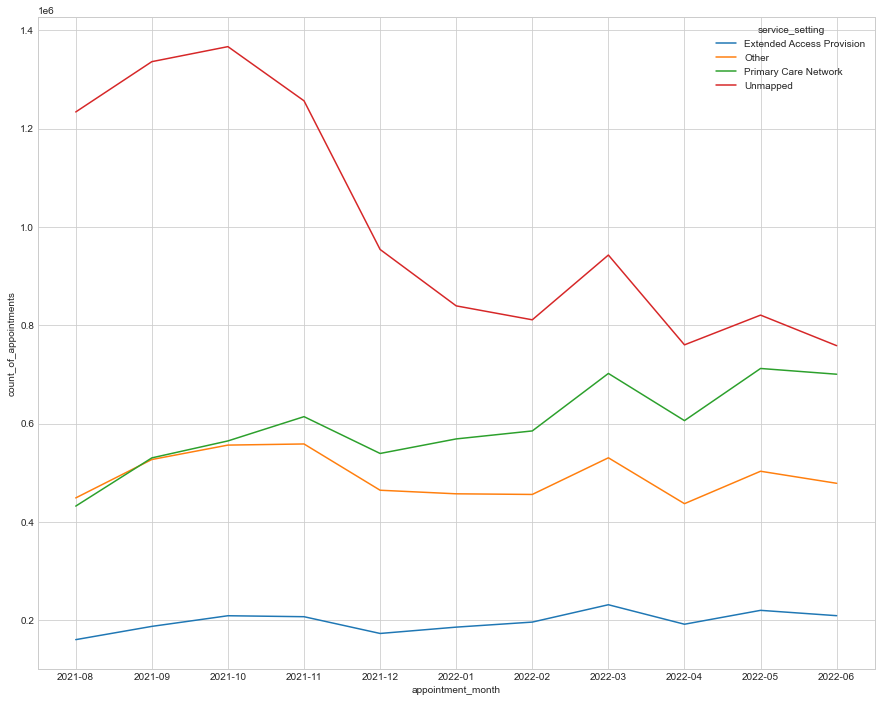

In [37]:
# Concentrate on service settings excluding the GP.
nc_agg_nogp = nc_agg[nc_agg['service_setting'] != 'General Practice']
sns.lineplot(x='appointment_month',y='count_of_appointments',data=nc_agg_nogp,hue='service_setting',estimator='sum')

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

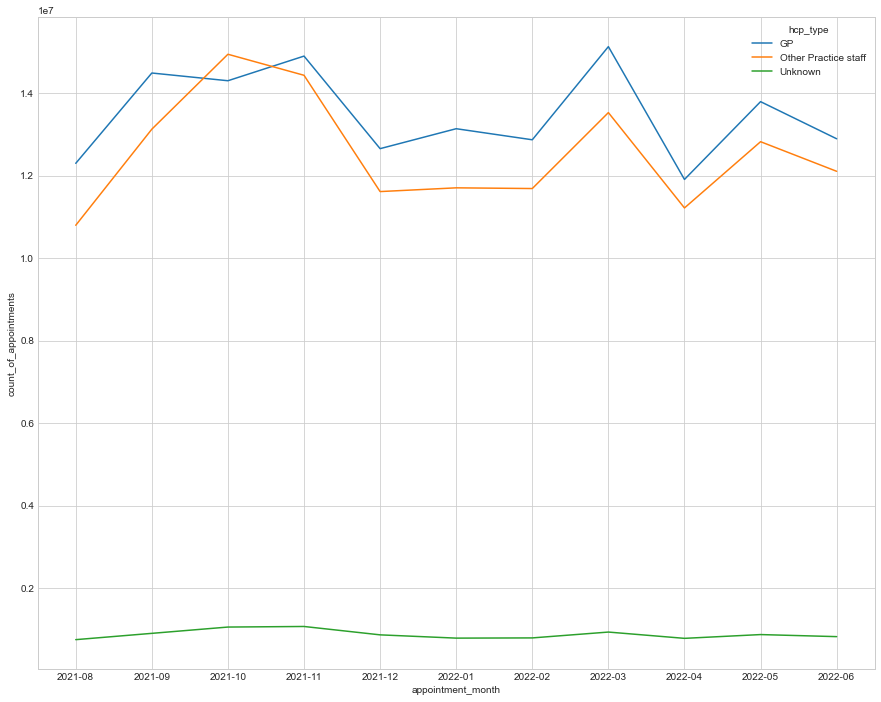

In [38]:
# How do the healthcare professional types differ over time?

sns.lineplot(x='appointment_month',y='count_of_appointments',hue='hcp_type',data=ar_agg, ci=None,estimator='sum')

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

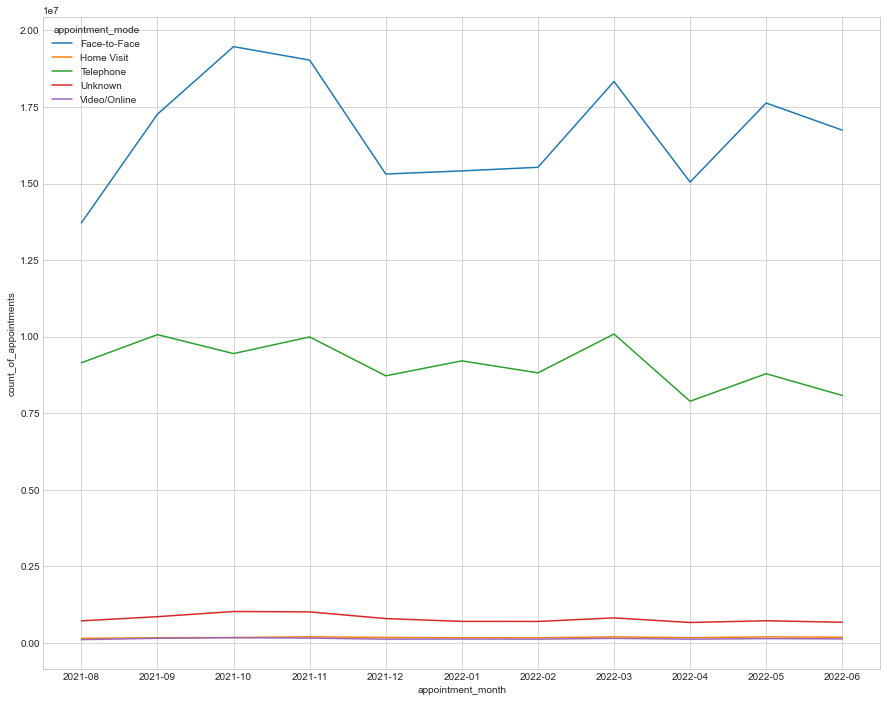

In [39]:
# Are there changes in terms of appointment type and the busiest months?

sns.lineplot(x='appointment_month',y='count_of_appointments',hue='appointment_mode',data=ar_agg, ci=None,estimator='sum')